# Covid-19 INDONESIA

In [ ]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
# File data input tersedia di direktori "../Datamining/".
# Misalnya, menjalankan ini (dengan mengklik run atau menekan Shift + Enter) akan mencantumkan file di direktori input

import os
print(os.listdir("../Datamining"))

# Hasil apa pun yang Anda tulis ke direktori saat ini disimpan sebagai keluaran.

In [4]:
content = """Date
Location_ISO_Code
Location
New_Cases
New_Deaths
New_Recovered
New_Active_Cases
Total_Cases
Total_Deaths
Total_Recovered
Total_Active_Cases
Location_Level
City_or_Regency
Province
Country
Continent
Island
Time_Zone
Special_Status
Total_Regencies
Total_Cities
Total_Districts
Total_Urban_Villages
Total_Rural_Villages
Area_(km2)
Population
Population_Density
Longitude
Latitude
New_Cases_per_Million
Total_Cases_per_Million
New_Deaths_per_Million
Total_Deaths_per_Million
Case_Fatality_Rate
Case_Recovered_Rate
Growth_Factor_of_New_Cases
Growth_Factor_of_New_Deaths"""
columns_list = content.split("\n")
# for i in range(len(columns_list)):
#   columns_list[i] = columns_list[i].strip()

In [12]:
data = pd.read_csv("../Datamining/covid_19_indonesia_time_series_all.csv",header=0,names = columns_list,index_col=False)
data = data.set_index('Location')
data.head()

,Date,Location_ISO_Code,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,0,2,489,20,39,430,...,106.836118,-6.204699,0.18,45.09,0.0,1.84,4.09%,7.98%,NaN,NaN
DKI Jakarta,3/2/2020,ID-JK,2,0,0,2,491,20,39,432,...,106.836118,-6.204699,0.18,45.27,0.0,1.84,4.07%,7.94%,1.0,1.0
Indonesia,3/2/2020,IDN,2,0,0,2,2,0,0,2,...,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00%,0.00%,NaN,NaN
Jawa Barat,3/2/2020,ID-JB,3,0,0,3,12,5,135,-128,...,107.603708,-6.920432,0.07,0.27,0.0,0.11,41.67%,1125.00%,NaN,NaN
Riau,3/2/2020,ID-RI,1,0,0,1,2,1,1,0,...,101.805109,0.511648,0.16,0.33,0.0,0.16,50.00%,50.00%,NaN,NaN


In [13]:
data.info()
data[0:10]

<class 'pandas.core.frame.DataFrame'>
Index: 10694 entries, DKI Jakarta to Sumatera Utara
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         10694 non-null  object 
 1   Location_ISO_Code            10694 non-null  object 
 2   New_Cases                    10694 non-null  int64  
 3   New_Deaths                   10694 non-null  int64  
 4   New_Recovered                10694 non-null  int64  
 5   New_Active_Cases             10694 non-null  int64  
 6   Total_Cases                  10694 non-null  int64  
 7   Total_Deaths                 10694 non-null  int64  
 8   Total_Recovered              10694 non-null  int64  
 9   Total_Active_Cases           10694 non-null  int64  
 10  Location_Level               10694 non-null  object 
 11  City_or_Regency              0 non-null      float64
 12  Province                     10368 non-null  object 
 13  Co

,Date,Location_ISO_Code,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,0,2,489,20,39,430,...,106.836118,-6.204699,0.18,45.09,0.00,1.84,4.09%,7.98%,NaN,NaN
DKI Jakarta,3/2/2020,ID-JK,2,0,0,2,491,20,39,432,...,106.836118,-6.204699,0.18,45.27,0.00,1.84,4.07%,7.94%,1.00,1.0
Indonesia,3/2/2020,IDN,2,0,0,2,2,0,0,2,...,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00%,0.00%,NaN,NaN
Jawa Barat,3/2/2020,ID-JB,3,0,0,3,12,5,135,-128,...,107.603708,-6.920432,0.07,0.27,0.00,0.11,41.67%,1125.00%,NaN,NaN
Riau,3/2/2020,ID-RI,1,0,0,1,2,1,1,0,...,101.805109,0.511648,0.16,0.33,0.00,0.16,50.00%,50.00%,NaN,NaN
DKI Jakarta,3/3/2020,ID-JK,2,0,0,2,493,20,39,434,...,106.836118,-6.204699,0.18,45.45,0.00,1.84,4.06%,7.91%,1.00,1.0
Indonesia,3/3/2020,IDN,0,0,0,0,2,0,0,2,...,113.921327,-0.789275,0.00,0.01,0.00,0.00,0.00%,0.00%,0.00,1.0
Jawa Barat,3/3/2020,ID-JB,1,1,0,0,13,6,135,-128,...,107.603708,-6.920432,0.02,0.29,0.02,0.13,46.15%,1038.46%,0.33,NaN
Riau,3/3/2020,ID-RI,0,0,0,0,2,1,1,0,...,101.805109,0.511648,0.00,0.33,0.00,0.16,50.00%,50.00%,0.00,1.0


In [15]:
data = data[['Date','Location_ISO_Code','New_Cases','New_Deaths',
             'Total_Cases','Total_Deaths','Total_Recovered','New_Active_Cases',
             'Total_Active_Cases','Longitude','Latitude']]
data.head(1000)

,Date,Location_ISO_Code,New_Cases,New_Deaths,Total_Cases,Total_Deaths,Total_Recovered,New_Active_Cases,Total_Active_Cases,Longitude,Latitude
Location,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,489,20,39,2,430,106.836118,-6.204699
DKI Jakarta,3/2/2020,ID-JK,2,0,491,20,39,2,432,106.836118,-6.204699
Indonesia,3/2/2020,IDN,2,0,2,0,0,2,2,113.921327,-0.789275
Jawa Barat,3/2/2020,ID-JB,3,0,12,5,135,3,-128,107.603708,-6.920432
Riau,3/2/2020,ID-RI,1,0,2,1,1,1,0,101.805109,0.511648
...,...,...,...,...,...,...,...,...,...,...,...
Sulawesi Utara,4/19/2020,ID-SA,0,0,20,6,7,0,7,124.521240,1.259638
Sumatera Barat,4/19/2020,ID-SB,1,0,72,7,15,1,50,100.465062,-0.850253
Sumatera Selatan,4/19/2020,ID-SS,5,0,89,3,4,5,82,104.169465,-3.216212


In [16]:
# 
data["Date"] = pd.to_datetime(data["Date"])

# Visulisasi : Total_Cases & Total_Deaths (Positif & Meninggal)¶

# Semua Kasus dan kematian Covid-19 di Indonesia

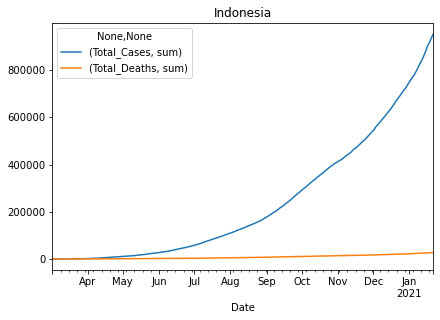

In [18]:
#IDN
ConfirmedCases_date_IDN= data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_IDN = data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_IDN= ConfirmedCases_date_IDN.join(fatalities_date_IDN)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_IDN.plot(ax=plt.gca(), title='Indonesia')

# Banyak Kasus dan Banyak Kematian yang disebabkan oleh Covid-19 di setiap provinsi

Text(0, 0.5, 'Confirmed cases')

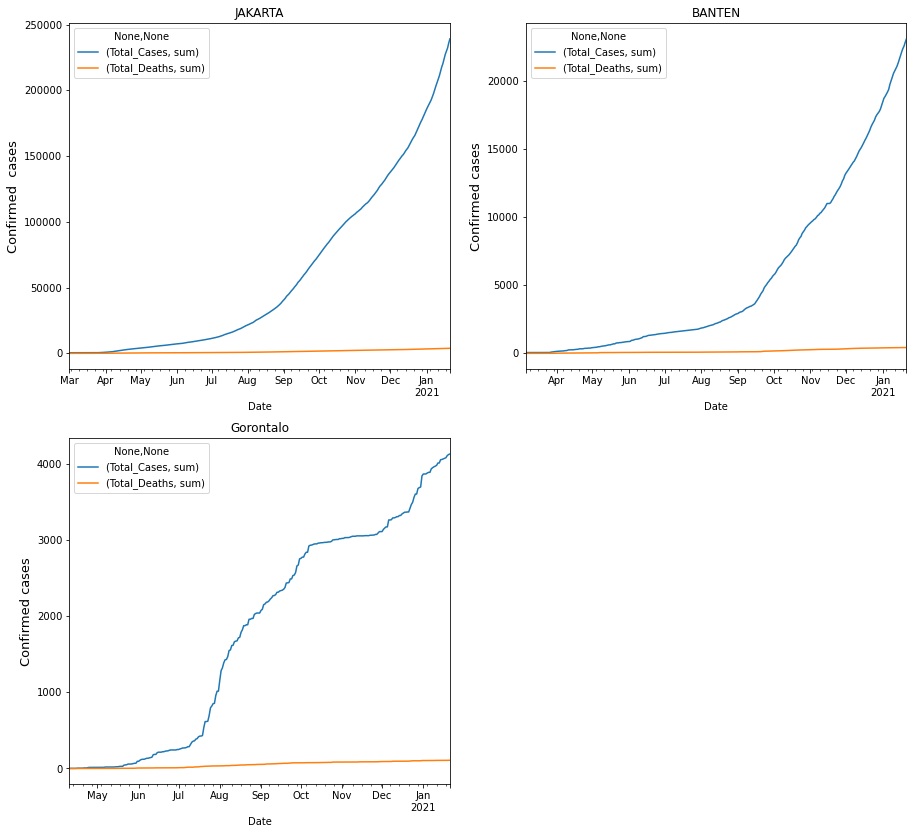

In [31]:
#ID-JK
ConfirmedCases_date_JK= data[data['Location_ISO_Code']=='ID-JK'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_JK = data[data['Location_ISO_Code']=='ID-JK'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JK = ConfirmedCases_date_JK.join(fatalities_date_JK)


#ID-BT
ConfirmedCases_date_BT= data[data['Location_ISO_Code']=='ID-BT'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_BT = data[data['Location_ISO_Code']=='ID-BT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BT = ConfirmedCases_date_BT.join(fatalities_date_BT)


#ID-GO
ConfirmedCases_date_GO= data[data['Location_ISO_Code']=='ID-GO'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_GO = data[data['Location_ISO_Code']=='ID-GO'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_GO = ConfirmedCases_date_GO.join(fatalities_date_GO)


plt.figure(figsize=(15,14))
plt.subplot(2, 2, 1)
total_date_JK.plot(ax=plt.gca(), title='JAKARTA')
plt.ylabel("Confirmed  cases", size=13)


plt.subplot(2, 2, 2)
total_date_BT.plot(ax=plt.gca(), title='BANTEN')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 3)
total_date_GO.plot(ax=plt.gca(), title='Gorontalo')
plt.ylabel("Confirmed cases", size=13)

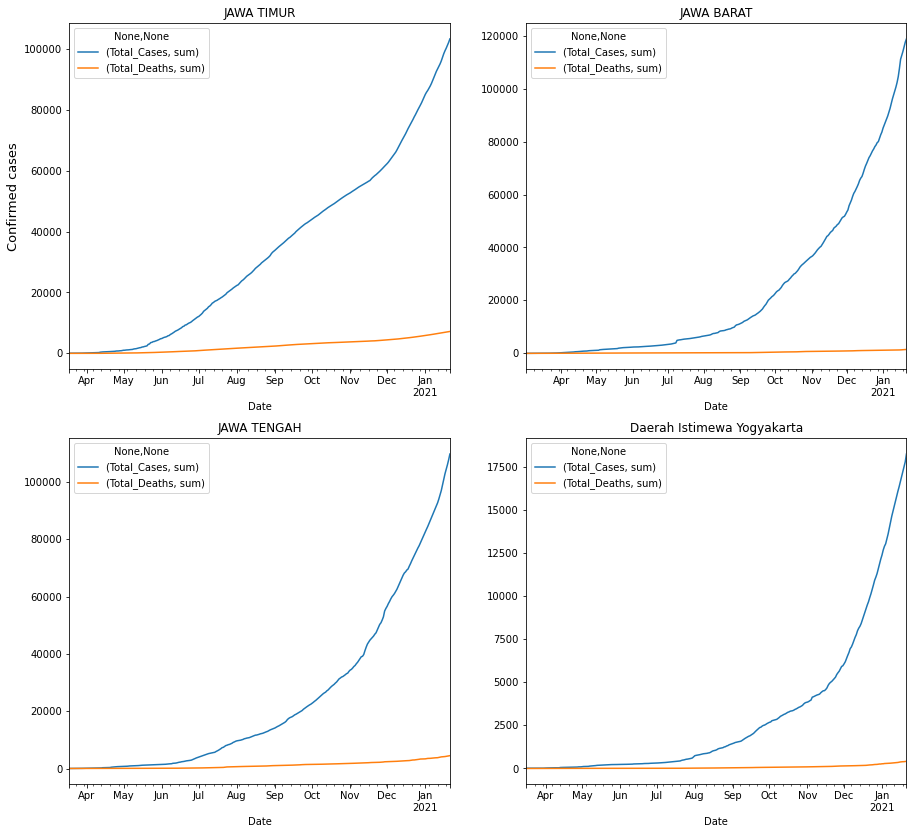

In [32]:
#ID-JI
ConfirmedCases_date_JI= data[data['Location_ISO_Code']=='ID-JI'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_JI = data[data['Location_ISO_Code']=='ID-JI'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JI = ConfirmedCases_date_JI.join(fatalities_date_JI)


#ID-JB
ConfirmedCases_date_JB= data[data['Location_ISO_Code']=='ID-JB'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_JB = data[data['Location_ISO_Code']=='ID-JB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JB = ConfirmedCases_date_JB.join(fatalities_date_JB)


#ID-JT
ConfirmedCases_date_JT= data[data['Location_ISO_Code']=='ID-JT'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_JT = data[data['Location_ISO_Code']=='ID-JT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JT = ConfirmedCases_date_JT.join(fatalities_date_JT)


#ID-YO
ConfirmedCases_date_YO= data[data['Location_ISO_Code']=='ID-YO'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_YO = data[data['Location_ISO_Code']=='ID-YO'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_YO = ConfirmedCases_date_YO.join(fatalities_date_YO)

plt.figure(figsize=(15,14))
plt.subplot(2, 2, 1)
total_date_JI.plot(ax=plt.gca(), title='JAWA TIMUR')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_JB.plot(ax=plt.gca(), title='JAWA BARAT')


plt.subplot(2, 2, 3)
total_date_JT.plot(ax=plt.gca(), title='JAWA TENGAH')

plt.subplot(2, 2, 4)
total_date_YO.plot(ax=plt.gca(), title='Daerah Istimewa Yogyakarta')

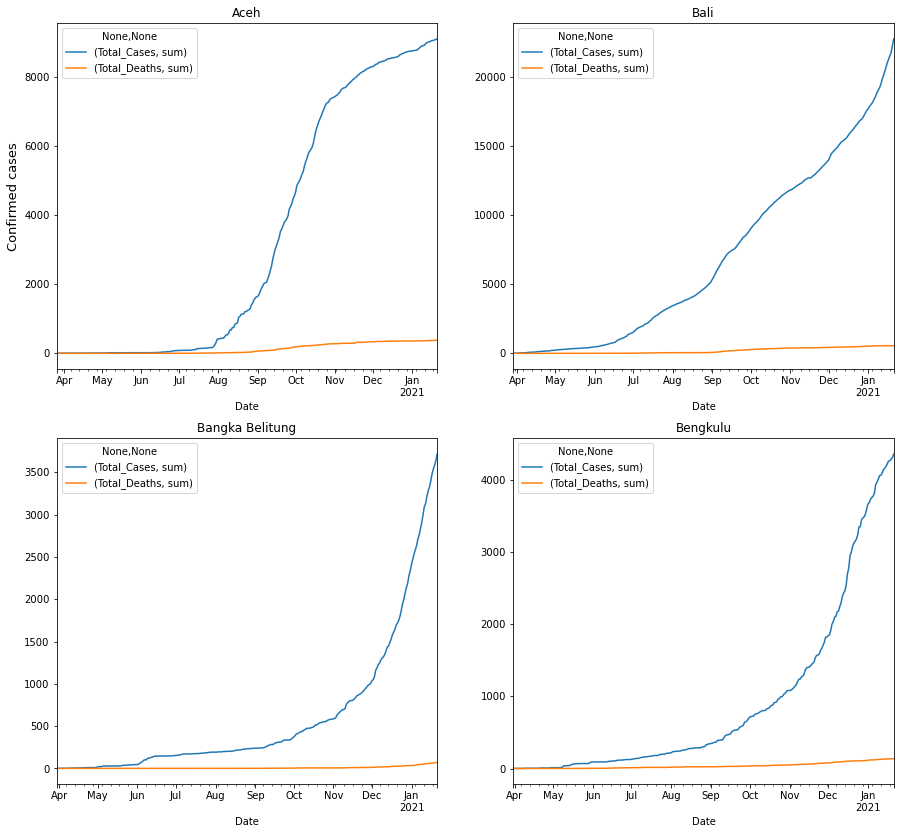

In [33]:
#ID-AC
ConfirmedCases_date_AC= data[data['Location_ISO_Code']=='ID-AC'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_AC = data[data['Location_ISO_Code']=='ID-AC'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_AC = ConfirmedCases_date_AC.join(fatalities_date_AC)


#ID-BA
ConfirmedCases_date_BA= data[data['Location_ISO_Code']=='ID-BA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_BA = data[data['Location_ISO_Code']=='ID-BA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BA = ConfirmedCases_date_BA.join(fatalities_date_BA)


#ID-BB
ConfirmedCases_date_BB= data[data['Location_ISO_Code']=='ID-BB'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_BB = data[data['Location_ISO_Code']=='ID-BB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BB = ConfirmedCases_date_BB.join(fatalities_date_BB)


#ID-BE
ConfirmedCases_date_BE= data[data['Location_ISO_Code']=='ID-BE'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_BE = data[data['Location_ISO_Code']=='ID-BE'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BE = ConfirmedCases_date_BE.join(fatalities_date_BE)

plt.figure(figsize=(15,14))
plt.subplot(2, 2, 1)
total_date_AC.plot(ax=plt.gca(), title='Aceh')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_BA.plot(ax=plt.gca(), title='Bali')


plt.subplot(2, 2, 3)
total_date_BB.plot(ax=plt.gca(), title='Bangka Belitung')

plt.subplot(2, 2, 4)
total_date_BE.plot(ax=plt.gca(), title='Bengkulu')

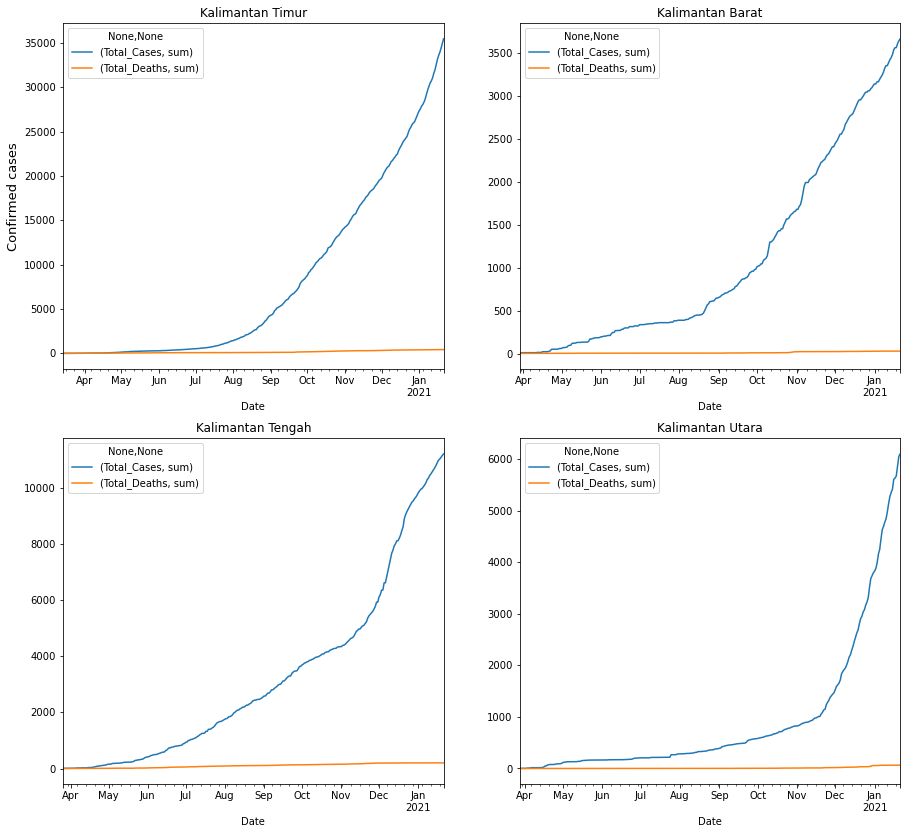

In [34]:
#ID-KI
ConfirmedCases_date_KI= data[data['Location_ISO_Code']=='ID-KI'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_KI = data[data['Location_ISO_Code']=='ID-KI'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KI = ConfirmedCases_date_KI.join(fatalities_date_BT)


#ID-KB
ConfirmedCases_date_KB= data[data['Location_ISO_Code']=='ID-KB'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_KB = data[data['Location_ISO_Code']=='ID-KB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KB = ConfirmedCases_date_KB.join(fatalities_date_KB)



#ID-KT
ConfirmedCases_date_KT= data[data['Location_ISO_Code']=='ID-KT'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_KT = data[data['Location_ISO_Code']=='ID-KT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KT = ConfirmedCases_date_KT.join(fatalities_date_KT)

#ID-KU
ConfirmedCases_date_KU= data[data['Location_ISO_Code']=='ID-KU'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_KU = data[data['Location_ISO_Code']=='ID-KU'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KU = ConfirmedCases_date_KU.join(fatalities_date_KU)

plt.figure(figsize=(15,14))
plt.subplot(2, 2, 1)
total_date_KI.plot(ax=plt.gca(), title='Kalimantan Timur')
plt.ylabel("Confirmed cases", size=13)

plt.subplot(2, 2, 2)
total_date_KB.plot(ax=plt.gca(), title='Kalimantan Barat')

plt.subplot(2, 2, 3)
total_date_KT.plot(ax=plt.gca(), title='Kalimantan Tengah')

plt.subplot(2, 2, 4)
total_date_KU.plot(ax=plt.gca(), title='Kalimantan Utara')

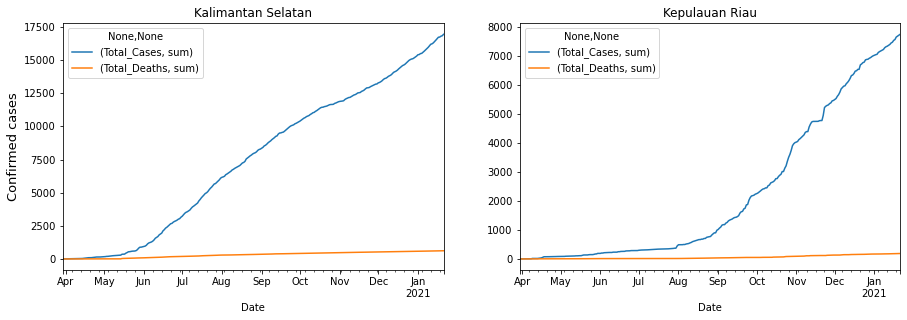

In [35]:
#ID-KS
ConfirmedCases_date_KS= data[data['Location_ISO_Code']=='ID-KS'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_KS = data[data['Location_ISO_Code']=='ID-KS'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KS = ConfirmedCases_date_KS.join(fatalities_date_KS)

#ID-KR
ConfirmedCases_date_KR= data[data['Location_ISO_Code']=='ID-KR'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_KR = data[data['Location_ISO_Code']=='ID-KR'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KR = ConfirmedCases_date_KR.join(fatalities_date_KR)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_KS.plot(ax=plt.gca(), title='Kalimantan Selatan')
plt.ylabel("Confirmed cases", size=13)



plt.subplot(2, 2, 2)
total_date_KR.plot(ax=plt.gca(), title='Kepulauan Riau')

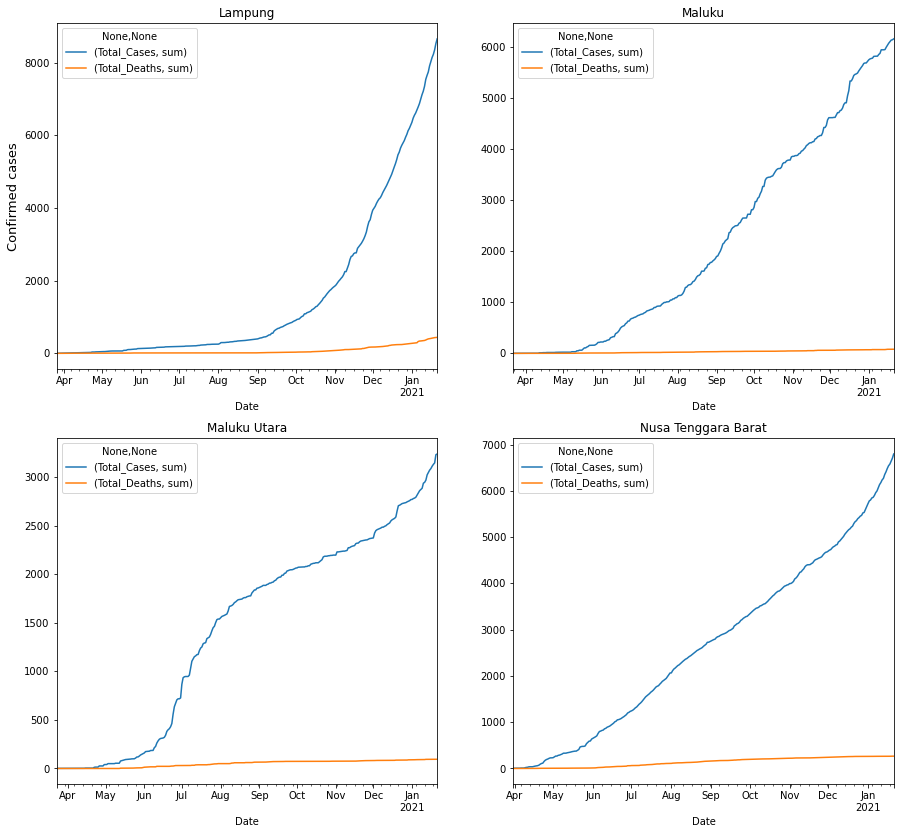

In [37]:
#ID-LA
ConfirmedCases_date_LA= data[data['Location_ISO_Code']=='ID-LA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_LA = data[data['Location_ISO_Code']=='ID-LA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_LA = ConfirmedCases_date_LA.join(fatalities_date_LA)


#ID-MA
ConfirmedCases_date_MA= data[data['Location_ISO_Code']=='ID-MA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_MA = data[data['Location_ISO_Code']=='ID-MA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_MA = ConfirmedCases_date_MA.join(fatalities_date_MA)



#ID-MU
ConfirmedCases_date_MU= data[data['Location_ISO_Code']=='ID-MU'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_MU = data[data['Location_ISO_Code']=='ID-MU'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_MU = ConfirmedCases_date_MU.join(fatalities_date_MU)

#ID-NB
ConfirmedCases_date_NB= data[data['Location_ISO_Code']=='ID-NB'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_NB = data[data['Location_ISO_Code']=='ID-NB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_NB = ConfirmedCases_date_NB.join(fatalities_date_NB)

plt.figure(figsize=(15,14))
plt.subplot(2, 2, 1)
total_date_LA.plot(ax=plt.gca(), title='Lampung')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_MA.plot(ax=plt.gca(), title='Maluku')


plt.subplot(2, 2, 3)
total_date_MU.plot(ax=plt.gca(), title='Maluku Utara')

plt.subplot(2, 2, 4)
total_date_NB.plot(ax=plt.gca(), title='Nusa Tenggara Barat')

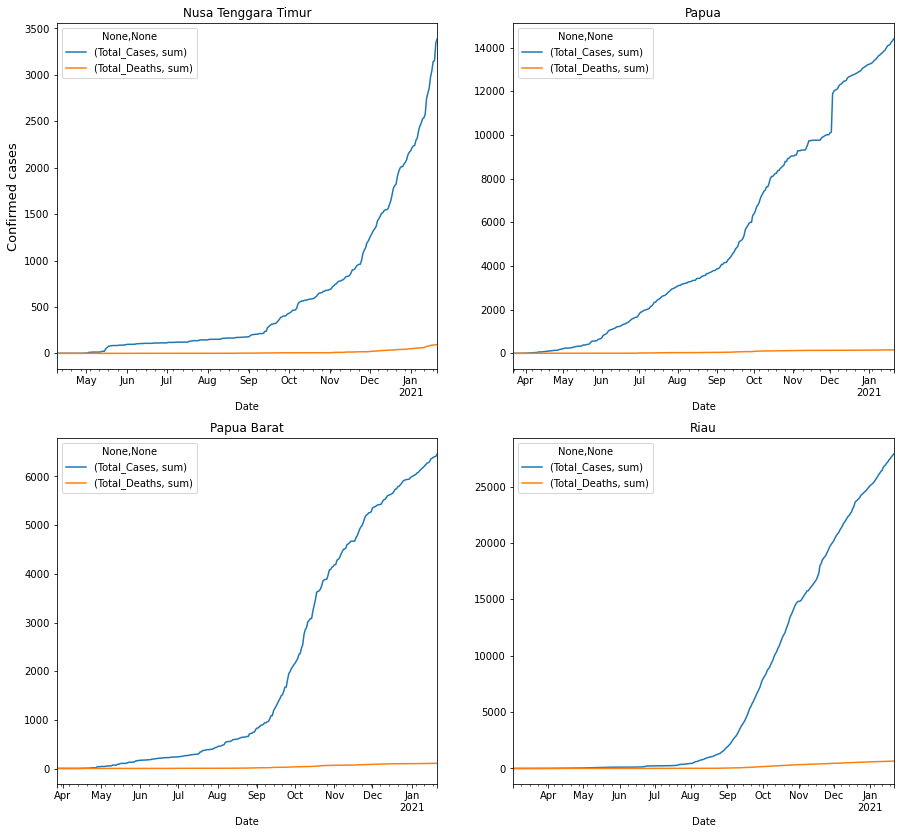

In [38]:
#ID-NT
ConfirmedCases_date_NT= data[data['Location_ISO_Code']=='ID-NT'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_NT = data[data['Location_ISO_Code']=='ID-NT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_NT = ConfirmedCases_date_NT.join(fatalities_date_NT)


#ID-PA
ConfirmedCases_date_PA= data[data['Location_ISO_Code']=='ID-PA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_PA = data[data['Location_ISO_Code']=='ID-PA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_PA = ConfirmedCases_date_PA.join(fatalities_date_PA)

#ID-PB
ConfirmedCases_date_PB= data[data['Location_ISO_Code']=='ID-PB'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_PB = data[data['Location_ISO_Code']=='ID-PB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_PB = ConfirmedCases_date_PB.join(fatalities_date_PB)

#ID-RI
ConfirmedCases_date_RI= data[data['Location_ISO_Code']=='ID-RI'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_RI = data[data['Location_ISO_Code']=='ID-RI'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_RI= ConfirmedCases_date_RI.join(fatalities_date_RI)

plt.figure(figsize=(15,14))
plt.subplot(2, 2, 1)
total_date_NT.plot(ax=plt.gca(), title='Nusa Tenggara Timur')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_PA.plot(ax=plt.gca(), title='Papua')


plt.subplot(2, 2, 3)
total_date_PB.plot(ax=plt.gca(), title='Papua Barat')

plt.subplot(2, 2, 4)
total_date_RI.plot(ax=plt.gca(), title='Riau')

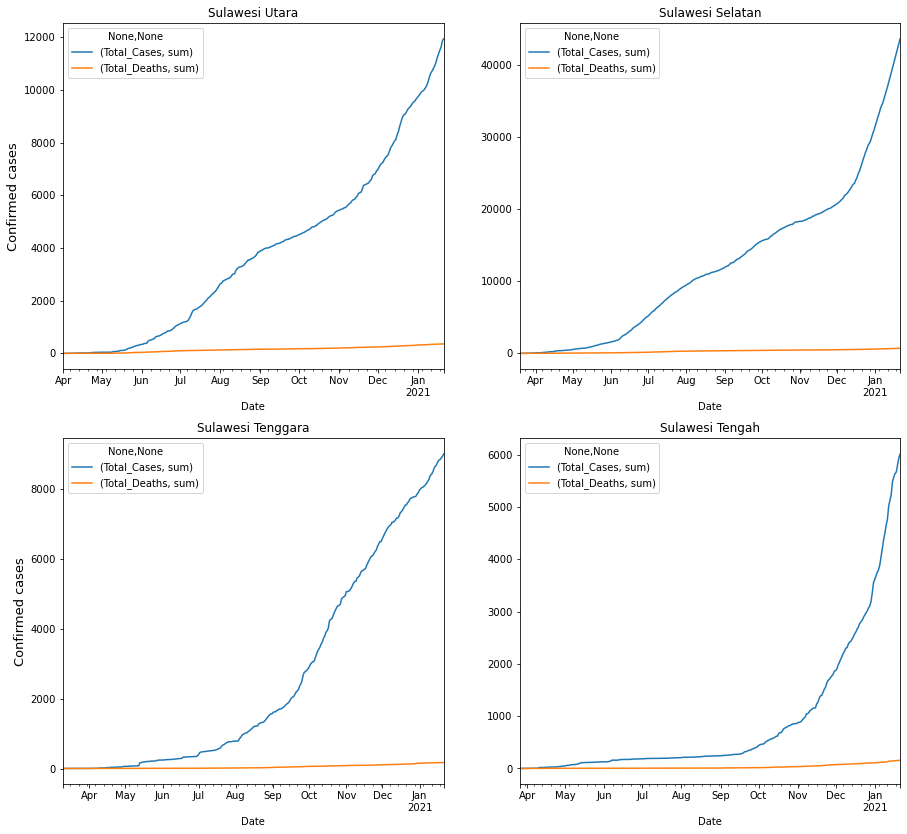

In [40]:
#ID-SA
ConfirmedCases_date_SA= data[data['Location_ISO_Code']=='ID-SA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_SA = data[data['Location_ISO_Code']=='ID-SA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SA = ConfirmedCases_date_SA.join(fatalities_date_SA)


#ID-SN
ConfirmedCases_date_SN= data[data['Location_ISO_Code']=='ID-SN'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_SN = data[data['Location_ISO_Code']=='ID-SN'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SN = ConfirmedCases_date_SN.join(fatalities_date_SN)

#ID-SG
ConfirmedCases_date_SG= data[data['Location_ISO_Code']=='ID-SG'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_SG = data[data['Location_ISO_Code']=='ID-SG'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SG = ConfirmedCases_date_SG.join(fatalities_date_SG)

#ID-ST
ConfirmedCases_date_ST= data[data['Location_ISO_Code']=='ID-ST'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_ST = data[data['Location_ISO_Code']=='ID-ST'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_ST = ConfirmedCases_date_ST.join(fatalities_date_ST)

plt.figure(figsize=(15,14))
plt.subplot(2, 2, 1)
total_date_SA.plot(ax=plt.gca(), title='Sulawesi Utara')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_SN.plot(ax=plt.gca(), title='Sulawesi Selatan')

plt.subplot(2, 2, 3)
total_date_SG.plot(ax=plt.gca(), title='Sulawesi Tenggara')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 4)
total_date_ST.plot(ax=plt.gca(), title='Sulawesi Tengah')

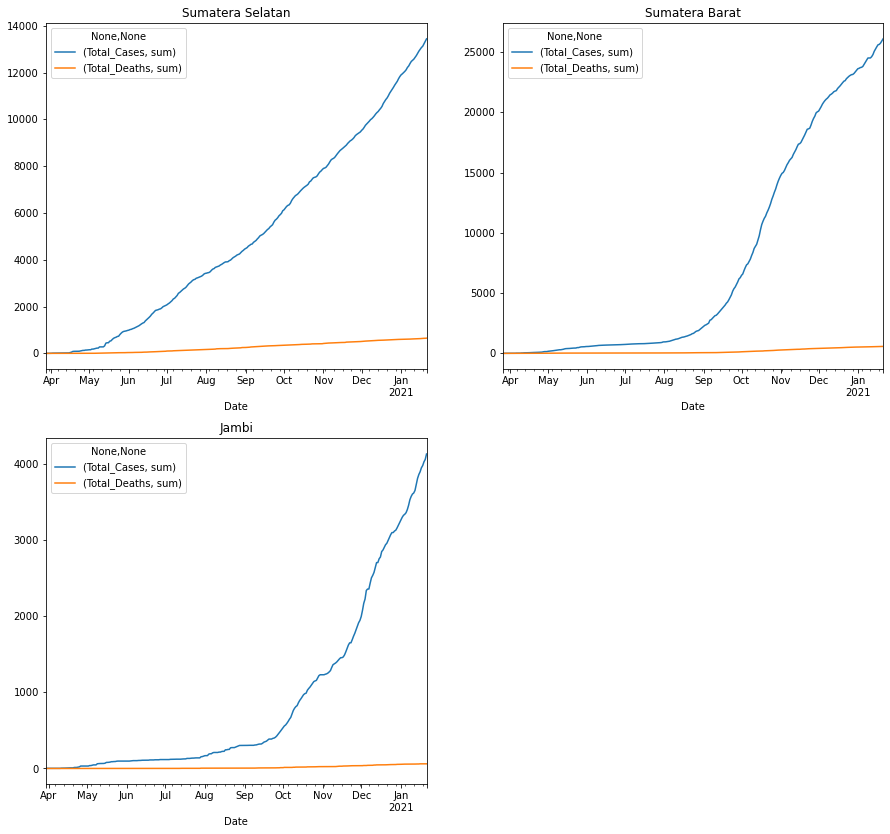

In [41]:
#ID-SS
ConfirmedCases_date_SS= data[data['Location_ISO_Code']=='ID-SS'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_SS = data[data['Location_ISO_Code']=='ID-SS'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SS= ConfirmedCases_date_SS.join(fatalities_date_SS)

#ID-SB
ConfirmedCases_date_SB= data[data['Location_ISO_Code']=='ID-SB'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_SB = data[data['Location_ISO_Code']=='ID-SB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SB = ConfirmedCases_date_SB.join(fatalities_date_SB)


#ID-JA
ConfirmedCases_date_JA= data[data['Location_ISO_Code']=='ID-JA'].groupby(['Date']).agg({'Total_Cases':['sum']})
fatalities_date_JA = data[data['Location_ISO_Code']=='ID-JA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JA = ConfirmedCases_date_JA.join(fatalities_date_JA)


plt.figure(figsize=(15,14))
plt.subplot(2, 2, 1)
total_date_SS.plot(ax=plt.gca(), title='Sumatera Selatan')


plt.subplot(2, 2, 2)
total_date_SB.plot(ax=plt.gca(), title='Sumatera Barat')


plt.subplot(2, 2, 3)
total_date_JA.plot(ax=plt.gca(), title='Jambi')

# Visualisasi : Total_Recovered & Total_Deaths (Sembuh dan meninggal)

# semua kasus di Indonesia

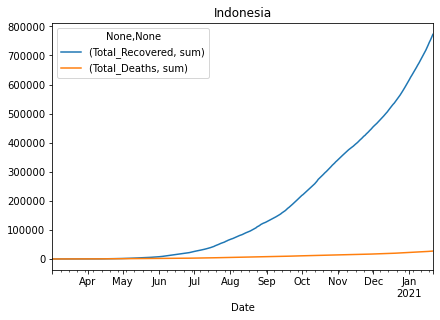

In [42]:
#IDN
Total_Recovered_date_IDN= data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_IDN = data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_IDN= Total_Recovered_date_IDN.join(Total_Deaths_date_IDN)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_IDN.plot(ax=plt.gca(), title='Indonesia')

# kasus pada setiap provinsi

Text(0, 0.5, 'Confirmed cases')

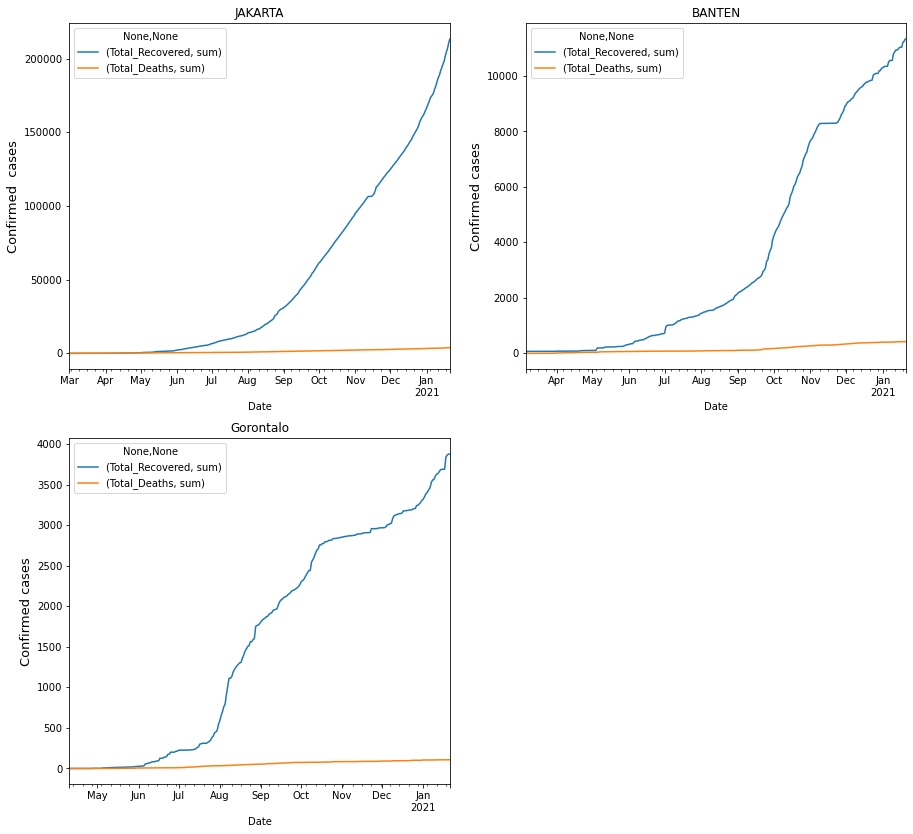

In [46]:
#ID-JK
Total_Recovered_date_JK= data[data['Location_ISO_Code']=='ID-JK'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_JK = data[data['Location_ISO_Code']=='ID-JK'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JK = Total_Recovered_date_JK.join(Total_Deaths_date_JK)


#ID-BT
Total_Recovered_date_BT= data[data['Location_ISO_Code']=='ID-BT'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_BT = data[data['Location_ISO_Code']=='ID-BT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BT = Total_Recovered_date_BT.join(Total_Deaths_date_BT)


#ID-GO
Total_Recovered_date_GO= data[data['Location_ISO_Code']=='ID-GO'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_GO = data[data['Location_ISO_Code']=='ID-GO'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_GO = Total_Recovered_date_GO.join(Total_Deaths_date_GO)


plt.figure(figsize=(15,14))
plt.subplot(2, 2, 1)
total_date_JK.plot(ax=plt.gca(), title='JAKARTA')
plt.ylabel("Confirmed  cases", size=13)


plt.subplot(2, 2, 2)
total_date_BT.plot(ax=plt.gca(), title='BANTEN')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 3)
total_date_GO.plot(ax=plt.gca(), title='Gorontalo')
plt.ylabel("Confirmed cases", size=13)

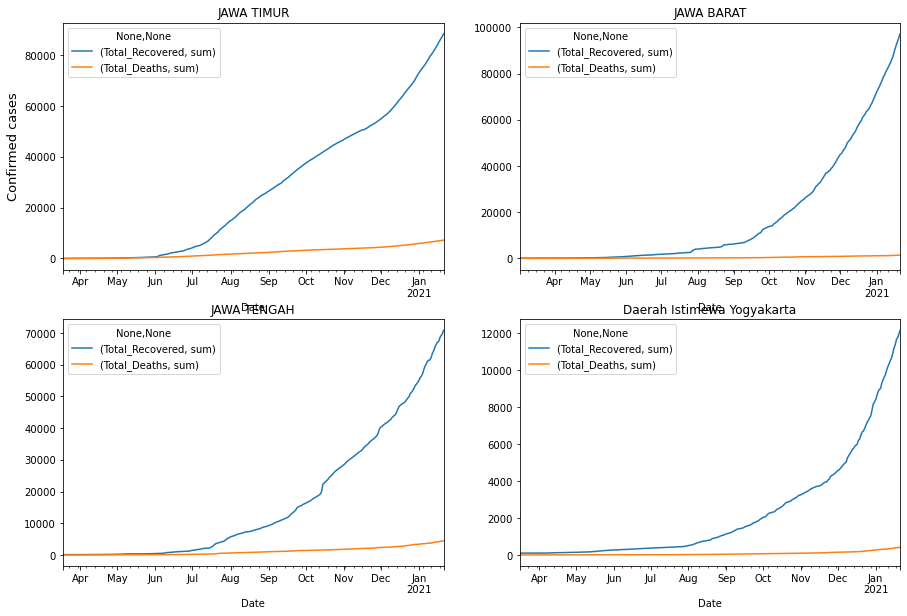

In [47]:
#ID-JI
Total_Recovered_date_JI= data[data['Location_ISO_Code']=='ID-JI'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_JI = data[data['Location_ISO_Code']=='ID-JI'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JI = Total_Recovered_date_JI.join(Total_Deaths_date_JI)


#ID-JB
Total_Recovered_date_JB= data[data['Location_ISO_Code']=='ID-JB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_JB = data[data['Location_ISO_Code']=='ID-JB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JB = Total_Recovered_date_JB.join(Total_Deaths_date_JB)


#ID-JT
Total_Recovered_date_JT= data[data['Location_ISO_Code']=='ID-JT'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_JT = data[data['Location_ISO_Code']=='ID-JT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JT = Total_Recovered_date_JT.join(Total_Deaths_date_JT)


#ID-YO
Total_Recovered_date_YO= data[data['Location_ISO_Code']=='ID-YO'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_YO = data[data['Location_ISO_Code']=='ID-YO'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_YO = Total_Recovered_date_YO.join(Total_Deaths_date_YO)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_JI.plot(ax=plt.gca(), title='JAWA TIMUR')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_JB.plot(ax=plt.gca(), title='JAWA BARAT')


plt.subplot(2, 2, 3)
total_date_JT.plot(ax=plt.gca(), title='JAWA TENGAH')

plt.subplot(2, 2, 4)
total_date_YO.plot(ax=plt.gca(), title='Daerah Istimewa Yogyakarta')

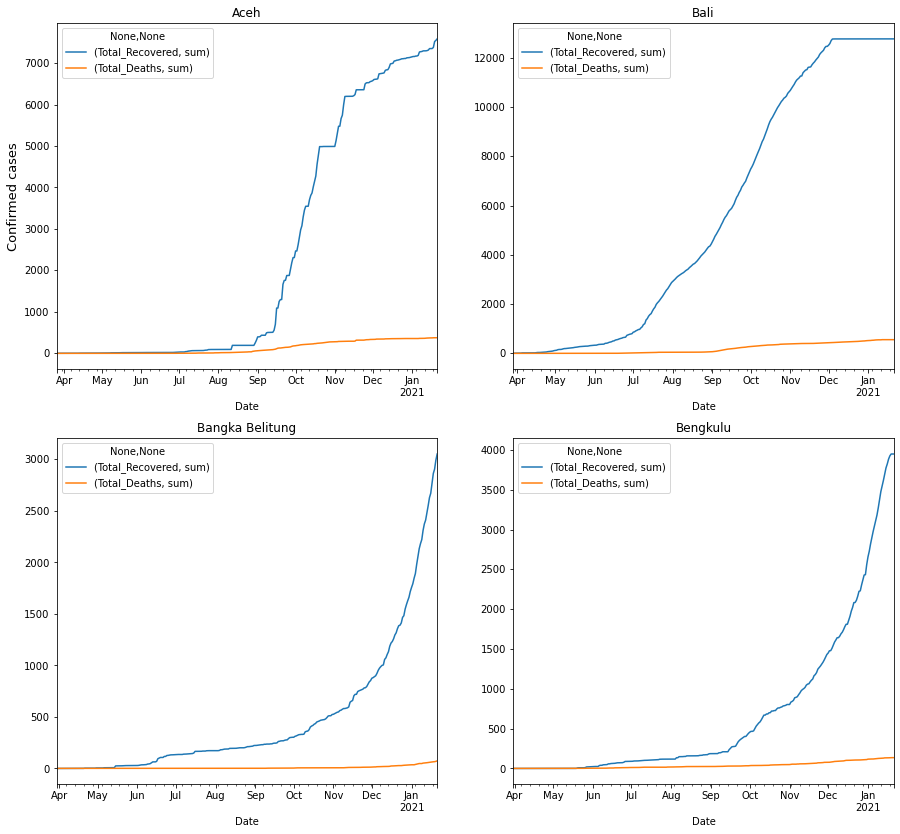

In [49]:
#ID-AC
ConfirmedCases_date_AC= data[data['Location_ISO_Code']=='ID-AC'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_date_AC = data[data['Location_ISO_Code']=='ID-AC'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_AC = ConfirmedCases_date_AC.join(fatalities_date_AC)


#ID-BA
ConfirmedCases_date_BA= data[data['Location_ISO_Code']=='ID-BA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_date_BA = data[data['Location_ISO_Code']=='ID-BA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BA = ConfirmedCases_date_BA.join(fatalities_date_BA)


#ID-BB
ConfirmedCases_date_BB= data[data['Location_ISO_Code']=='ID-BB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_date_BB = data[data['Location_ISO_Code']=='ID-BB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BB = ConfirmedCases_date_BB.join(fatalities_date_BB)


#ID-BE
ConfirmedCases_date_BE= data[data['Location_ISO_Code']=='ID-BE'].groupby(['Date']).agg({'Total_Recovered':['sum']})
fatalities_date_BE = data[data['Location_ISO_Code']=='ID-BE'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_BE = ConfirmedCases_date_BE.join(fatalities_date_BE)

plt.figure(figsize=(15,14))
plt.subplot(2, 2, 1)
total_date_AC.plot(ax=plt.gca(), title='Aceh')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_BA.plot(ax=plt.gca(), title='Bali')


plt.subplot(2, 2, 3)
total_date_BB.plot(ax=plt.gca(), title='Bangka Belitung')

plt.subplot(2, 2, 4)
total_date_BE.plot(ax=plt.gca(), title='Bengkulu')

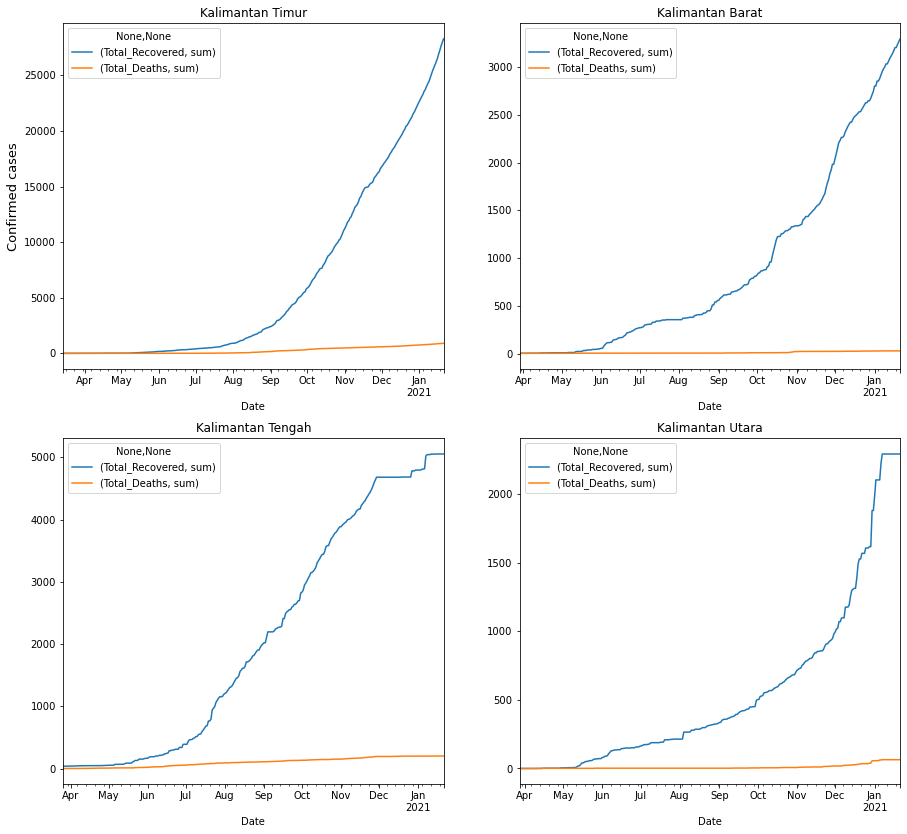

In [51]:
#ID-KI
Total_Recovered_date_KI= data[data['Location_ISO_Code']=='ID-KI'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_KI = data[data['Location_ISO_Code']=='ID-KI'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KI = Total_Recovered_date_KI.join(Total_Deaths_date_KI)


#ID-KB
Total_Recovered_date_KB= data[data['Location_ISO_Code']=='ID-KB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_KB = data[data['Location_ISO_Code']=='ID-KB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KB = Total_Recovered_date_KB.join(Total_Deaths_date_KB)

#ID-KT
Total_Recovered_date_KT= data[data['Location_ISO_Code']=='ID-KT'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_KT = data[data['Location_ISO_Code']=='ID-KT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KT = Total_Recovered_date_KT.join(Total_Deaths_date_KT)

#ID-KU
Total_Recovered_date_KU= data[data['Location_ISO_Code']=='ID-KU'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_KU = data[data['Location_ISO_Code']=='ID-KU'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KU = Total_Recovered_date_KU.join(Total_Deaths_date_KU)


plt.figure(figsize=(15,14))
plt.subplot(2, 2, 1)
total_date_KI.plot(ax=plt.gca(), title='Kalimantan Timur')
plt.ylabel("Confirmed cases", size=13)

plt.subplot(2, 2, 2)
total_date_KB.plot(ax=plt.gca(), title='Kalimantan Barat')


plt.subplot(2, 2, 3)
total_date_KT.plot(ax=plt.gca(), title='Kalimantan Tengah')

plt.subplot(2, 2, 4)
total_date_KU.plot(ax=plt.gca(), title='Kalimantan Utara')

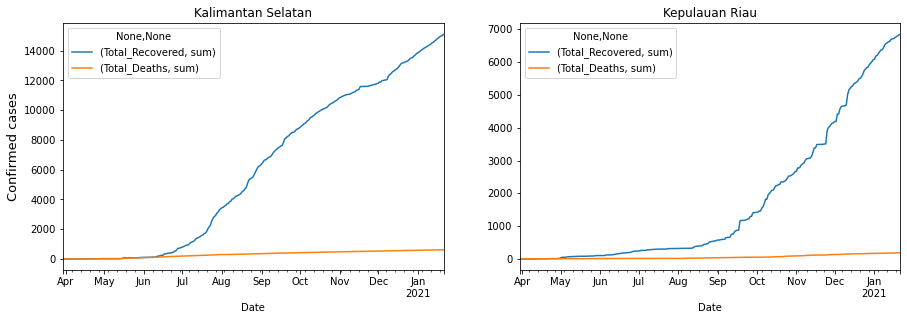

In [52]:
#ID-KS
Total_Recovered_date_KS= data[data['Location_ISO_Code']=='ID-KS'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_KS = data[data['Location_ISO_Code']=='ID-KS'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KS = Total_Recovered_date_KS.join(Total_Deaths_date_KS)

#ID-KR
Total_Recovered_date_KR= data[data['Location_ISO_Code']=='ID-KR'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_KR = data[data['Location_ISO_Code']=='ID-KR'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_KR = Total_Recovered_date_KR.join(Total_Deaths_date_KR)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_KS.plot(ax=plt.gca(), title='Kalimantan Selatan')

plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_KR.plot(ax=plt.gca(), title='Kepulauan Riau')

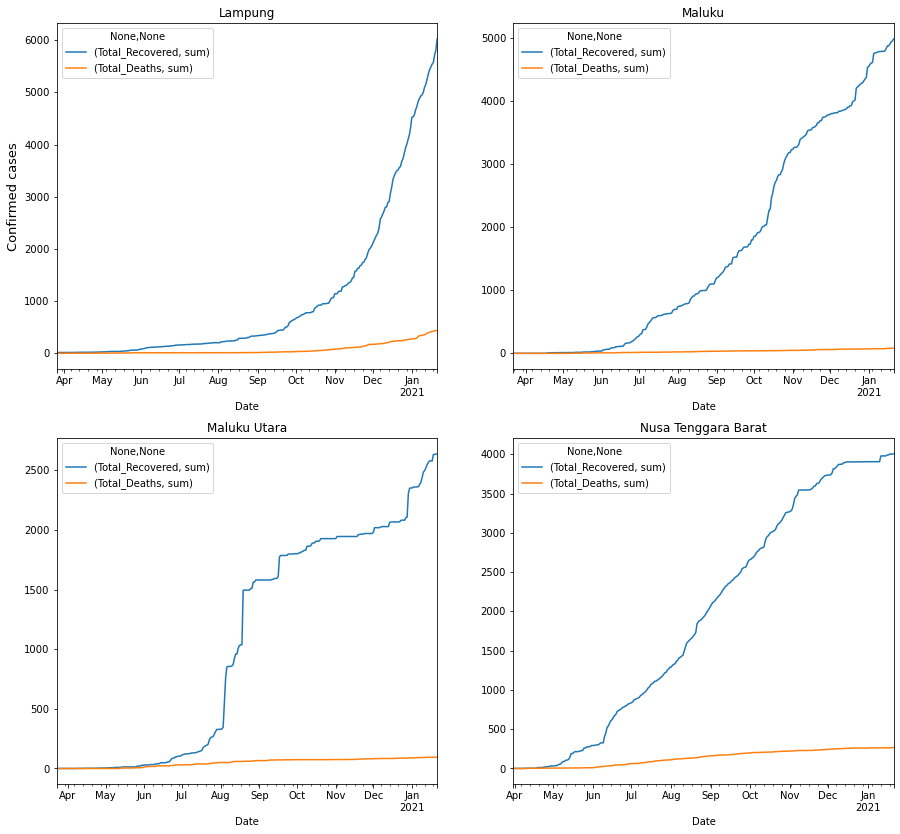

In [53]:
#ID-LA
Total_Recovered_date_LA= data[data['Location_ISO_Code']=='ID-LA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_LA = data[data['Location_ISO_Code']=='ID-LA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_LA = Total_Recovered_date_LA.join(Total_Deaths_date_LA)


#ID-MA
Total_Recovered_date_MA= data[data['Location_ISO_Code']=='ID-MA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_MA = data[data['Location_ISO_Code']=='ID-MA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_MA = Total_Recovered_date_MA.join(Total_Deaths_date_MA)


#ID-MU
Total_Recovered_date_MU= data[data['Location_ISO_Code']=='ID-MU'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_MU = data[data['Location_ISO_Code']=='ID-MU'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_MU = Total_Recovered_date_MU.join(Total_Deaths_date_MU)

#ID-NB
Total_Recovered_date_NB= data[data['Location_ISO_Code']=='ID-NB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_NB = data[data['Location_ISO_Code']=='ID-NB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_NB = Total_Recovered_date_NB.join(Total_Deaths_date_NB)

plt.figure(figsize=(15,14))
plt.subplot(2, 2, 1)
total_date_LA.plot(ax=plt.gca(), title='Lampung')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_MA.plot(ax=plt.gca(), title='Maluku')


plt.subplot(2, 2, 3)
total_date_MU.plot(ax=plt.gca(), title='Maluku Utara')

plt.subplot(2, 2, 4)
total_date_NB.plot(ax=plt.gca(), title='Nusa Tenggara Barat')

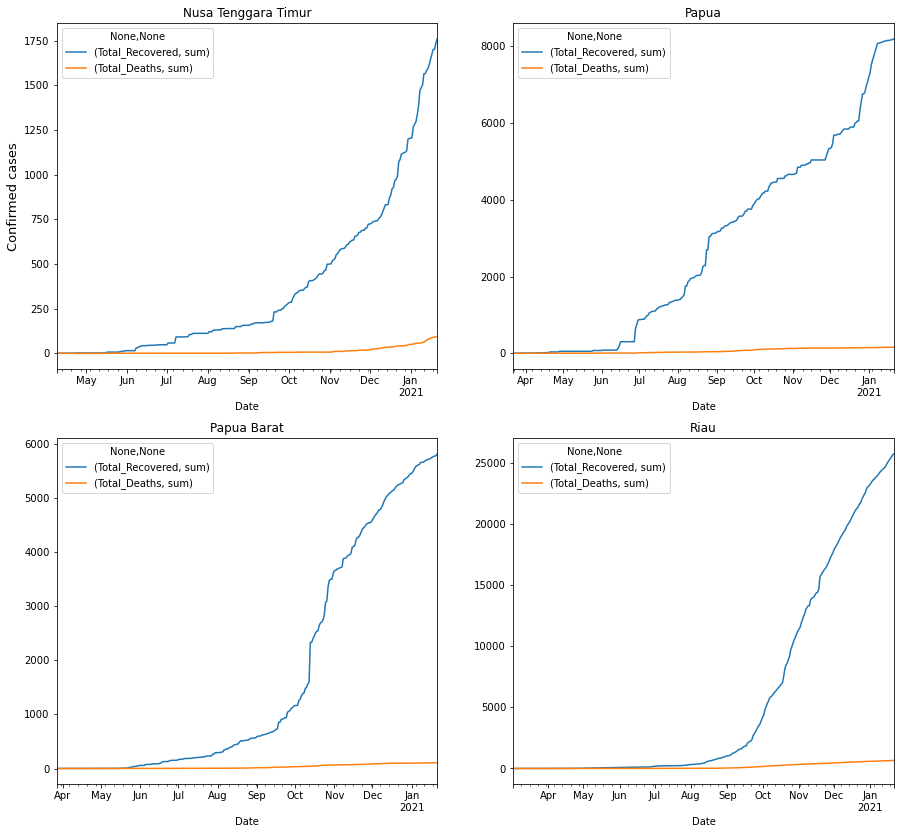

In [54]:
#ID-NT
Total_Recovered_date_NT= data[data['Location_ISO_Code']=='ID-NT'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_NT = data[data['Location_ISO_Code']=='ID-NT'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_NT = Total_Recovered_date_NT.join(Total_Deaths_date_NT)


#ID-PA
Total_Recovered_date_PA= data[data['Location_ISO_Code']=='ID-PA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_PA = data[data['Location_ISO_Code']=='ID-PA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_PA = Total_Recovered_date_PA.join(Total_Deaths_date_PA)

#ID-PB
Total_Recovered_date_PB= data[data['Location_ISO_Code']=='ID-PB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_PB = data[data['Location_ISO_Code']=='ID-PB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_PB = Total_Recovered_date_PB.join(Total_Deaths_date_PB)

#ID-RI
Total_Recovered_date_RI= data[data['Location_ISO_Code']=='ID-RI'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_RI = data[data['Location_ISO_Code']=='ID-RI'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_RI= Total_Recovered_date_RI.join(Total_Deaths_date_RI)

plt.figure(figsize=(15,14))
plt.subplot(2, 2, 1)
total_date_NT.plot(ax=plt.gca(), title='Nusa Tenggara Timur')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_PA.plot(ax=plt.gca(), title='Papua')


plt.subplot(2, 2, 3)
total_date_PB.plot(ax=plt.gca(), title='Papua Barat')

plt.subplot(2, 2, 4)
total_date_RI.plot(ax=plt.gca(), title='Riau')

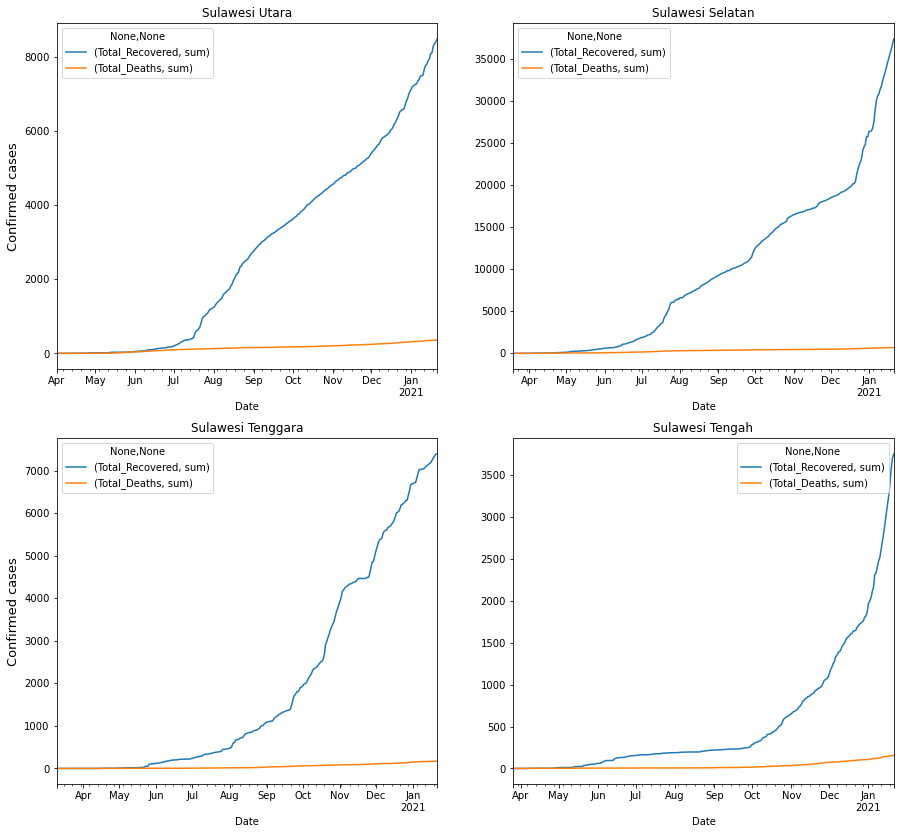

In [55]:
#ID-SA
Total_Recovered_date_SA= data[data['Location_ISO_Code']=='ID-SA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_SA = data[data['Location_ISO_Code']=='ID-SA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SA = Total_Recovered_date_SA.join(Total_Deaths_date_SA)


#ID-SN
Total_Recovered_date_SN= data[data['Location_ISO_Code']=='ID-SN'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_SN = data[data['Location_ISO_Code']=='ID-SN'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SN = Total_Recovered_date_SN.join(Total_Deaths_date_SN)

#ID-SG
Total_Recovered_date_SG= data[data['Location_ISO_Code']=='ID-SG'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_SG = data[data['Location_ISO_Code']=='ID-SG'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SG = Total_Recovered_date_SG.join(Total_Deaths_date_SG)

#ID-ST
Total_Recovered_date_ST= data[data['Location_ISO_Code']=='ID-ST'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_ST = data[data['Location_ISO_Code']=='ID-ST'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_ST = Total_Recovered_date_ST.join(Total_Deaths_date_ST)

plt.figure(figsize=(15,14))
plt.subplot(2, 2, 1)
total_date_SA.plot(ax=plt.gca(), title='Sulawesi Utara')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 2)
total_date_SN.plot(ax=plt.gca(), title='Sulawesi Selatan')

plt.subplot(2, 2, 3)
total_date_SG.plot(ax=plt.gca(), title='Sulawesi Tenggara')
plt.ylabel("Confirmed cases", size=13)


plt.subplot(2, 2, 4)
total_date_ST.plot(ax=plt.gca(), title='Sulawesi Tengah')

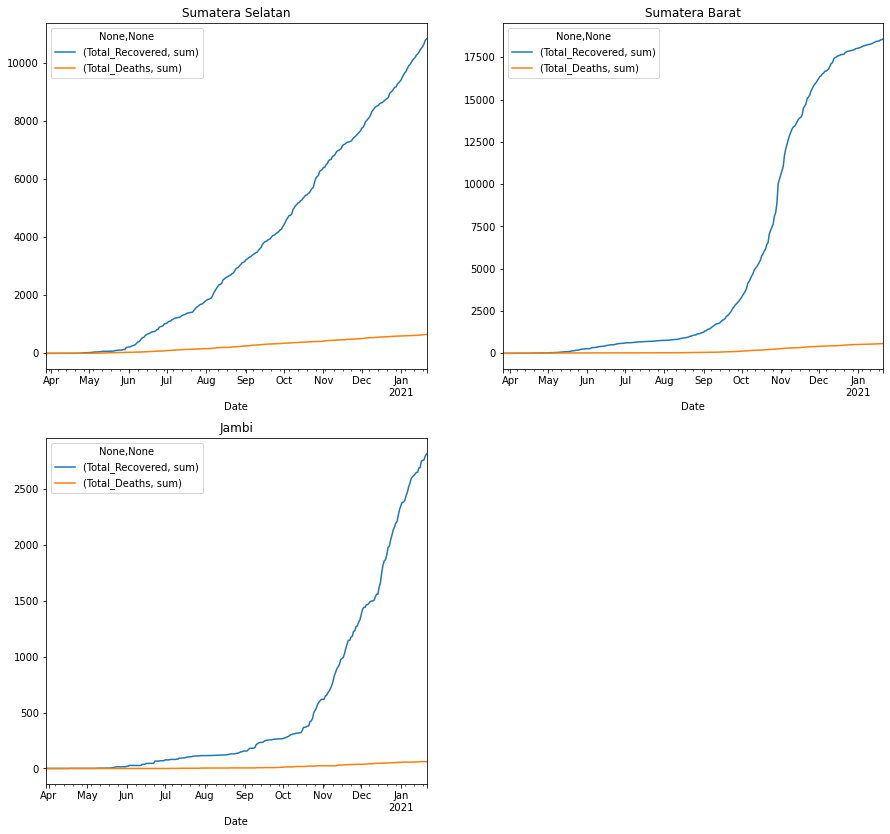

In [56]:
#ID-SS
Total_Recovered_date_SS= data[data['Location_ISO_Code']=='ID-SS'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_SS = data[data['Location_ISO_Code']=='ID-SS'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SS= Total_Recovered_date_SS.join(Total_Deaths_date_SS)

#ID-SB
Total_Recovered_date_SB= data[data['Location_ISO_Code']=='ID-SB'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_SB = data[data['Location_ISO_Code']=='ID-SB'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_SB = Total_Recovered_date_SB.join(Total_Deaths_date_SB)


#ID-JA
Total_Recovered_date_JA= data[data['Location_ISO_Code']=='ID-JA'].groupby(['Date']).agg({'Total_Recovered':['sum']})
Total_Deaths_date_JA = data[data['Location_ISO_Code']=='ID-JA'].groupby(['Date']).agg({'Total_Deaths':['sum']})
total_date_JA = Total_Recovered_date_JA.join(Total_Deaths_date_JA)


plt.figure(figsize=(15,14))
plt.subplot(2, 2, 1)
total_date_SS.plot(ax=plt.gca(), title='Sumatera Selatan')


plt.subplot(2, 2, 2)
total_date_SB.plot(ax=plt.gca(), title='Sumatera Barat')


plt.subplot(2, 2, 3)
total_date_JA.plot(ax=plt.gca(), title='Jambi')

# Visualisasi : Total_Cases & New_Active_Cases (kasus & kasus aktif baru)

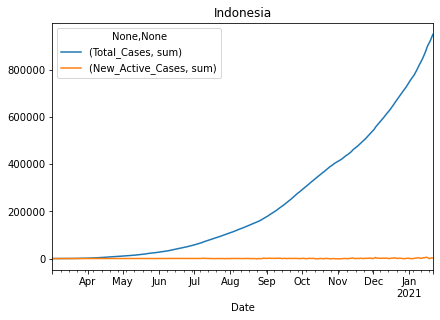

In [60]:
#IDN
TotalCases_date_IDN= data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Cases':['sum']})
New_Active_Cases_date_IDN = data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'New_Active_Cases':['sum']})
total_date_IDN= TotalCases_date_IDN.join(New_Active_Cases_date_IDN)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_IDN.plot(ax=plt.gca(), title='Indonesia')

# Visualization : Total_Deaths & New_Deathss (kasus kematian & kasus kematian terbaru)

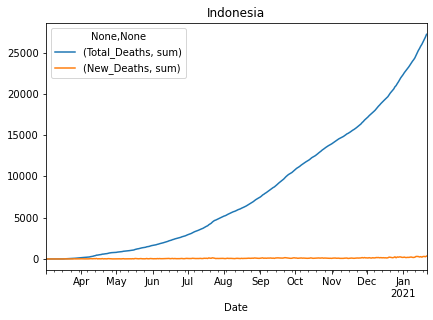

In [61]:
#IDN
Total_Deaths_date_IDN= data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'Total_Deaths':['sum']})
New_Deaths_date_IDN = data[data['Location_ISO_Code']=='IDN'].groupby(['Date']).agg({'New_Deaths':['sum']})
total_date_IDN= Total_Deaths_date_IDN.join(New_Deaths_date_IDN)


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_IDN.plot(ax=plt.gca(), title='Indonesia')

# Prediksi

In [64]:
data1 = pd.read_csv("../Datamining/covid_19_indonesia_time_series_all.csv",
                    header=0,names = columns_list,index_col=False)
data1 = data1.set_index('Location')
data1.head()

,Date,Location_ISO_Code,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,0,2,489,20,39,430,...,106.836118,-6.204699,0.18,45.09,0.0,1.84,4.09%,7.98%,NaN,NaN
DKI Jakarta,3/2/2020,ID-JK,2,0,0,2,491,20,39,432,...,106.836118,-6.204699,0.18,45.27,0.0,1.84,4.07%,7.94%,1.0,1.0
Indonesia,3/2/2020,IDN,2,0,0,2,2,0,0,2,...,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00%,0.00%,NaN,NaN
Jawa Barat,3/2/2020,ID-JB,3,0,0,3,12,5,135,-128,...,107.603708,-6.920432,0.07,0.27,0.0,0.11,41.67%,1125.00%,NaN,NaN
Riau,3/2/2020,ID-RI,1,0,0,1,2,1,1,0,...,101.805109,0.511648,0.16,0.33,0.0,0.16,50.00%,50.00%,NaN,NaN


In [65]:
data1= data1.replace([np.inf, -np.inf], np.nan)
data1 = data1.fillna(0)
data1

,Date,Location_ISO_Code,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,0,2,489,20,39,430,...,106.836118,-6.204699,0.18,45.09,0.00,1.84,4.09%,7.98%,0.00,0.00
DKI Jakarta,3/2/2020,ID-JK,2,0,0,2,491,20,39,432,...,106.836118,-6.204699,0.18,45.27,0.00,1.84,4.07%,7.94%,1.00,1.00
Indonesia,3/2/2020,IDN,2,0,0,2,2,0,0,2,...,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00%,0.00%,0.00,0.00
Jawa Barat,3/2/2020,ID-JB,3,0,0,3,12,5,135,-128,...,107.603708,-6.920432,0.07,0.27,0.00,0.11,41.67%,1125.00%,0.00,0.00
Riau,3/2/2020,ID-RI,1,0,0,1,2,1,1,0,...,101.805109,0.511648,0.16,0.33,0.00,0.16,50.00%,50.00%,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sulawesi Tenggara,1/21/2021,ID-SG,77,1,1,75,9016,172,7392,1452,...,122.070311,-4.124689,29.22,3421.03,0.38,65.26,1.91%,81.99%,1.97,0.00
Sulawesi Utara,1/21/2021,ID-SA,92,2,83,7,11931,361,8497,3073,...,124.521240,1.259638,34.82,4516.10,0.76,136.64,3.03%,71.22%,0.39,1.00
Sumatera Barat,1/21/2021,ID-SB,181,4,49,128,26091,577,18591,6923,...,100.465062,-0.850253,32.79,4727.28,0.72,104.54,2.21%,71.25%,1.08,0.57


mencoba meramalkan penyebaran COVID-19 di Indonesia. Prediksi variabel: Tanggal

Location_ISO_Code
New_Recovered
Total_Cases
Total_Deaths
Total_Recovered
Total_Active_Cases
Longitude
Latitude

In [ ]:
Target :

New_Cases
New_Deaths

In [66]:
##Convert sting to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df

In [67]:
data1 = FunLabelEncoder(data1)
data1.info()
data1.iloc[235:300,:]

<class 'pandas.core.frame.DataFrame'>
Index: 10694 entries, DKI Jakarta to Sumatera Utara
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         10694 non-null  int32  
 1   Location_ISO_Code            10694 non-null  int32  
 2   New_Cases                    10694 non-null  int64  
 3   New_Deaths                   10694 non-null  int64  
 4   New_Recovered                10694 non-null  int64  
 5   New_Active_Cases             10694 non-null  int64  
 6   Total_Cases                  10694 non-null  int64  
 7   Total_Deaths                 10694 non-null  int64  
 8   Total_Recovered              10694 non-null  int64  
 9   Total_Active_Cases           10694 non-null  int64  
 10  Location_Level               10694 non-null  int32  
 11  City_or_Regency              10694 non-null  float64
 12  Province                     10694 non-null  int32  
 13  Co

,Date,Location_ISO_Code,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
Sulawesi Tengah,132,31,0,0,0,0,1,0,0,1,...,121.201093,-1.004137,0.00,0.34,0.00,0.00,0,0,0.00,1.00
Sulawesi Tenggara,132,27,0,0,0,0,3,1,0,2,...,122.070311,-4.124689,0.00,1.14,0.00,0.38,597,0,1.00,1.00
Sumatera Barat,132,26,2,0,0,2,5,0,3,2,...,100.465062,-0.850253,0.36,0.91,0.00,0.00,0,2377,0.67,1.00
Sumatera Utara,132,32,0,1,0,-1,8,2,0,6,...,99.051964,2.191894,0.00,0.54,0.07,0.13,481,0,1.00,0.00
Aceh,133,0,1,0,0,1,5,0,2,3,...,96.910522,4.225615,0.19,0.95,0.00,0.00,0,1304,0.33,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jambi,136,6,1,0,0,1,2,0,0,2,...,102.723640,-1.697698,0.29,0.57,0.00,0.00,0,0,0.00,0.00
Jawa Barat,136,7,26,2,3,21,203,31,147,25,...,107.603708,-6.920432,0.58,4.49,0.04,0.69,339,3379,0.79,1.00
Jawa Tengah,136,10,14,1,0,13,77,16,115,-54,...,110.201115,-7.259097,0.38,2.12,0.03,0.44,468,301,2.00,0.50


# Split Data(membagi data)

In [ ]:
Data untuk pelatihan dan pengujian Memilih sekumpulan data pelatihan yang akan diinput 
dalam algoritma Machine Learning, untuk memastikan bahwa algoritma klasifikasi pelatihan 
dapat digeneralisasikan dengan baik ke data baru. Untuk penelitian ini menggunakan 
ukuran sampel 10% (bertujuan untuk mengurangi efek overfitting).

# Target 1 : New_Cases (kasus baru)

In [68]:
from sklearn.model_selection import train_test_split
Y = data1['New_Cases']
X = data1.drop(columns=['New_Cases'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=9)

In [69]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (9624, 35)
Y train shape:  (9624,)
X test shape:  (1070, 35)
Y test shape:  (1070,)


# Decision Tree (Clustering)

In [71]:
from sklearn.tree import DecisionTreeClassifier

# define the model
dtcla = DecisionTreeClassifier(random_state=None)

# train model
dtcla.fit(X_train, Y_train)

# predict target values
Y_predict = dtcla.predict(X_test)

In [72]:
#Test
X_test

,Date,Location_ISO_Code,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,Location_Level,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
Sulawesi Tenggara,181,27,0,0,6,189,5,19,165,1,...,122.070311,-4.124689,2.28,71.71,0.00,1.90,427,8,0.35,1.00
Indonesia,314,34,113,4343,367,266845,10218,196196,60431,0,...,113.921327,-0.789275,18.19,1006.26,0.43,38.53,577,3470,1.04,0.88
Maluku Utara,102,19,0,3,5,2748,87,2108,553,1,...,127.539107,0.212037,6.12,2101.23,0.00,66.52,511,3734,2.67,1.00
Kalimantan Utara,241,16,0,0,0,215,2,188,25,1,...,116.218879,2.891013,0.00,331.58,0.00,3.08,51,4725,1.00,1.00
Sulawesi Utara,228,25,0,10,17,1109,97,189,823,1,...,124.521240,1.259638,10.22,419.78,0.00,36.72,1067,417,1.04,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Daerah Istimewa Yogyakarta,78,33,1,31,-7,4165,100,3434,631,1,...,110.444878,-7.894502,6.89,1147.06,0.28,27.54,402,4287,0.15,0.50
Kepulauan Riau,59,13,2,0,0,4738,121,3385,1232,1,...,108.261746,3.916346,1.04,2455.69,1.04,62.71,417,3296,0.00,2.00
Jambi,170,6,0,0,0,2,0,0,2,1,...,102.723640,-1.697698,0.00,0.57,0.00,0.00,0,0,1.00,1.00


# Target 2 : New_Deaths (kematian baru)

In [73]:
from sklearn.model_selection import train_test_split
Y1 = data1['New_Deaths']
X1 = data1.drop(columns=['New_Deaths'])
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.1, random_state=9)

In [74]:
print('X1 train shape: ', X1_train.shape)
print('Y1 train shape: ', Y1_train.shape)
print('X1 test shape: ', X1_test.shape)
print('Y1 test shape: ', Y1_test.shape)

X1 train shape:  (9624, 35)
Y1 train shape:  (9624,)
X1 test shape:  (1070, 35)
Y1 test shape:  (1070,)


In [75]:
from sklearn.tree import DecisionTreeClassifier

#define the model
dtcla = DecisionTreeClassifier(random_state=None)

# train model
dtcla.fit(X1_train, Y1_train)

# predict target values
Y1_predict = dtcla.predict(X1_test)

In [76]:
#Test
data1=X1_test
data1 

,Date,Location_ISO_Code,New_Cases,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,Total_Active_Cases,Location_Level,...,Longitude,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Location,,,,,,,,,,,,,,,,,,,,,
Sulawesi Tenggara,181,27,6,0,6,189,5,19,165,1,...,122.070311,-4.124689,2.28,71.71,0.00,1.90,427,8,0.35,1.00
Indonesia,314,34,4823,4343,367,266845,10218,196196,60431,0,...,113.921327,-0.789275,18.19,1006.26,0.43,38.53,577,3470,1.04,0.88
Maluku Utara,102,19,8,3,5,2748,87,2108,553,1,...,127.539107,0.212037,6.12,2101.23,0.00,66.52,511,3734,2.67,1.00
Kalimantan Utara,241,16,0,0,0,215,2,188,25,1,...,116.218879,2.891013,0.00,331.58,0.00,3.08,51,4725,1.00,1.00
Sulawesi Utara,228,25,27,10,17,1109,97,189,823,1,...,124.521240,1.259638,10.22,419.78,0.00,36.72,1067,417,1.04,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Daerah Istimewa Yogyakarta,78,33,25,31,-7,4165,100,3434,631,1,...,110.444878,-7.894502,6.89,1147.06,0.28,27.54,402,4287,0.15,0.50
Kepulauan Riau,59,13,2,0,0,4738,121,3385,1232,1,...,108.261746,3.916346,1.04,2455.69,1.04,62.71,417,3296,0.00,2.00
Jambi,170,6,0,0,0,2,0,0,2,1,...,102.723640,-1.697698,0.00,0.57,0.00,0.00,0,0,1.00,1.00


In [78]:
#dataframe baru
Hasil = pd.DataFrame({'New_Cases':Y_predict,'New_Deaths':Y1_predict})
                        

#Visualisasi 100 data
Hasil.head(100)

,New_Cases,New_Deaths
0,6,0
1,4002,114
2,8,0
3,0,0
4,27,0
...,...,...
95,12,0
96,124,0
97,1,0
98,2,1


In [79]:
#Convert DataFrame ke berkas csv yang dapat diunggah
#Ini disimpan di direktori yang sama dengan buku catatan Anda

filename = 'hasil_predeksi_covid19_indonesia.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: hasil_predeksi_covid19_indonesia.csv
